# Transfer Entropy in Financial Market



by Abhinav Sharma

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            239 non-null    object 
 1   Gold            239 non-null    float64
 2   Nifty50         239 non-null    float64
 3   Gold_Return     238 non-null    float64
 4   Nifty50_Return  238 non-null    float64
dtypes: float64(4), object(1)
memory usage: 9.5+ KB
None


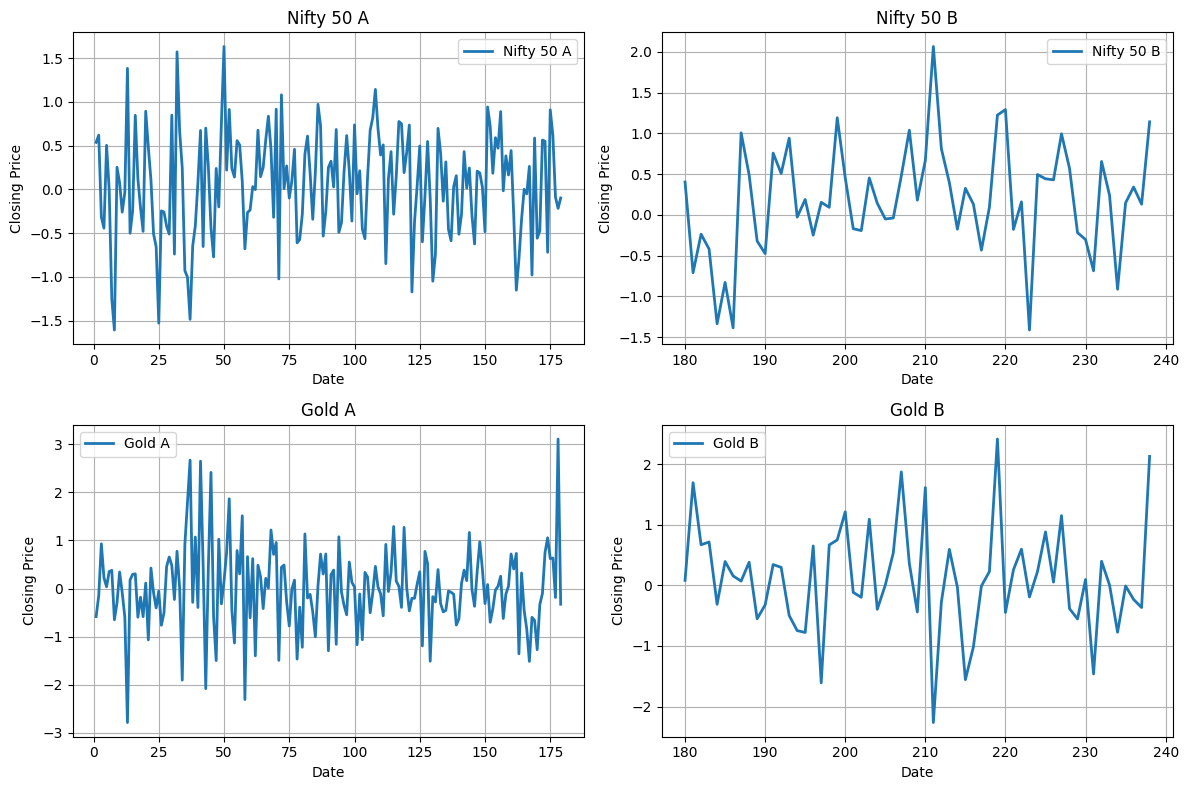

In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Load your dataset
file_path = "returns_data.csv"  # Update with your actual file path
data = pd.read_csv(file_path)

# Display basic information about the loaded dataset
print("Dataset Information:")
print(data.info())

# Assuming your dataset has columns 'Nifty50' and 'Gold' representing the closing prices

# Divide the data into approximately 3/4 (A) and 1/4 (B)
data_a = data.iloc[:180]  # Assuming 239 values, adjust accordingly
data_b = data.iloc[180:]

# Divide Nifty 50 into 3/4 (A) and 1/4 (B)
nifty_a = data_a['Nifty50_Return']
nifty_b = data_b['Nifty50_Return']

# Divide Gold into 3/4 (A) and 1/4 (B)
gold_a = data_a['Gold_Return']
gold_b = data_b['Gold_Return']

# Combine the data into a single DataFrame
stock_data = pd.DataFrame({'Gold_A': gold_a, 'Gold_B': gold_b, 'Nifty50_A': nifty_a, 'Nifty50_B': nifty_b})

# Plotting individual graphs
plt.figure(figsize=(12, 8))

# Nifty 50 A
plt.subplot(2, 2, 1)
plt.plot(stock_data['Nifty50_A'], label='Nifty 50 A', linewidth=2)
plt.title('Nifty 50 A')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)

# Nifty 50 B
plt.subplot(2, 2, 2)
plt.plot(stock_data['Nifty50_B'], label='Nifty 50 B', linewidth=2)
plt.title('Nifty 50 B')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)

# Gold A
plt.subplot(2, 2, 3)
plt.plot(stock_data['Gold_A'], label='Gold A', linewidth=2)
plt.title('Gold A')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)

# Gold B
plt.subplot(2, 2, 4)
plt.plot(stock_data['Gold_B'], label='Gold B', linewidth=2)
plt.title('Gold B')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


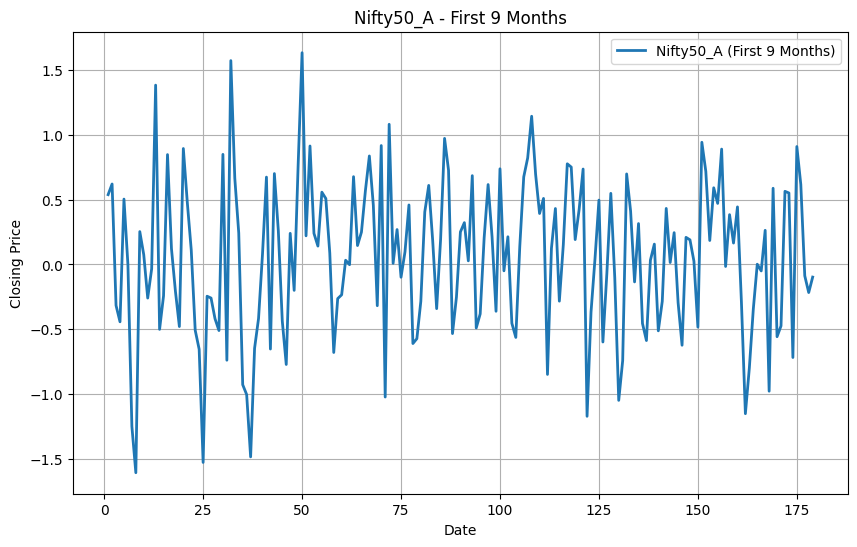

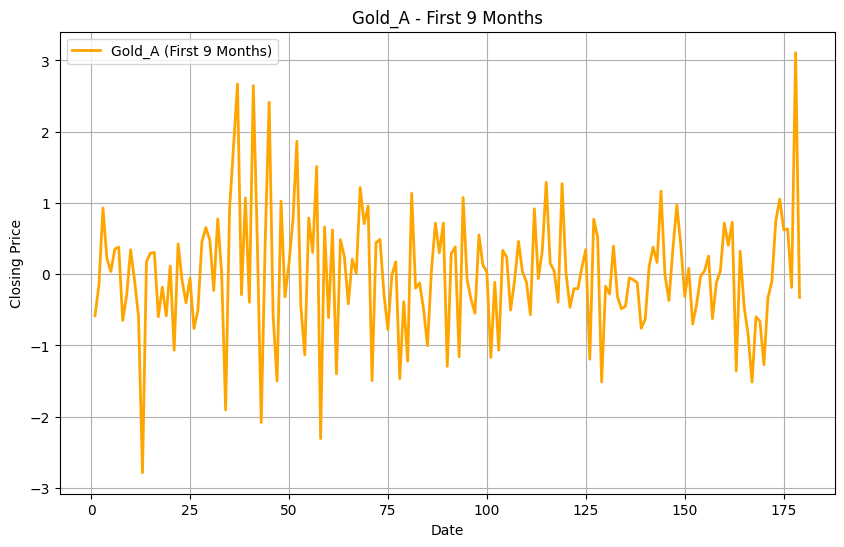

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named stock_data with 'Nifty50_A' and 'Gold_A' columns
# For example, if Nifty50_A and Gold_A are columns in a DataFrame called stock_data:

# Extracting the approximately first 9 months of Nifty50_A
nifty50_a = stock_data['Nifty50_A'].iloc[:180]  # Assuming 21 trading days in a month

# Extracting the approximately first 9 months of Gold_A
gold_a = stock_data['Gold_A'].iloc[:180]  # Assuming 21 trading days in a month

# Saving time series to variables (a, b, c, and d)
a = nifty50_a
b = stock_data['Nifty50_B']
c = gold_a
d = stock_data['Gold_B']

# Plotting the extracted data for Nifty50_A
plt.figure(figsize=(10, 6))
plt.plot(nifty50_a, label='Nifty50_A (First 9 Months)', linewidth=2)
plt.title('Nifty50_A - First 9 Months')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the extracted data for Gold_A
plt.figure(figsize=(10, 6))
plt.plot(gold_a, label='Gold_A (First 9 Months)', linewidth=2, color='orange')
plt.title('Gold_A - First 9 Months')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

# Save the time series to CSV files with new names
a.to_csv('nifty50_a_custom.csv', header=True)
b.to_csv('nifty50_b_custom.csv', header=True)
c.to_csv('gold_a_custom.csv', header=True)
d.to_csv('gold_b_custom.csv', header=True)


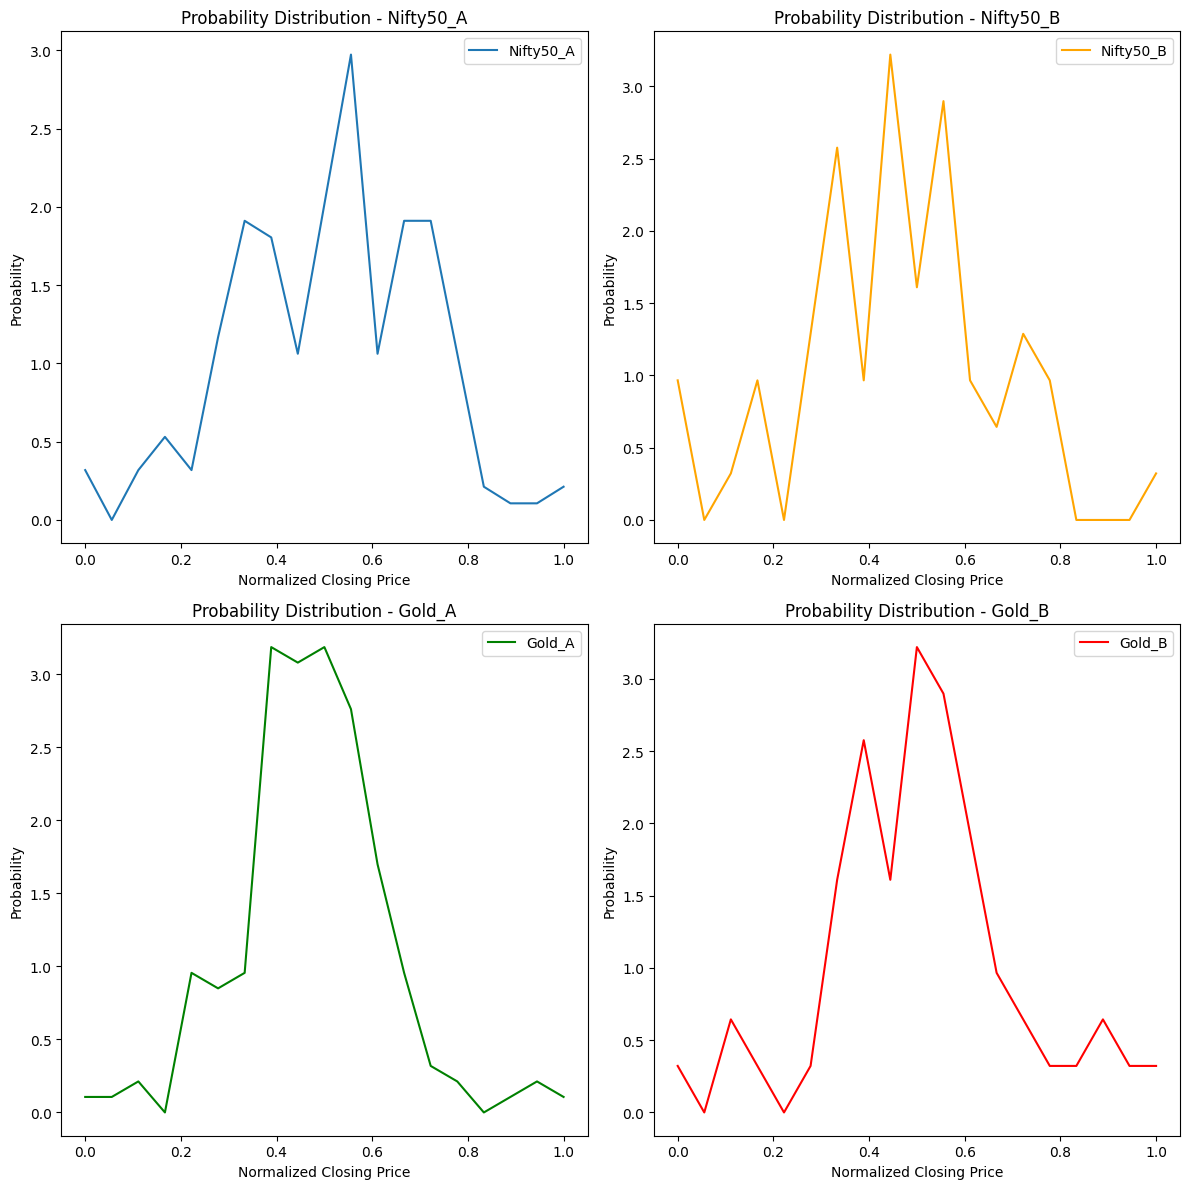

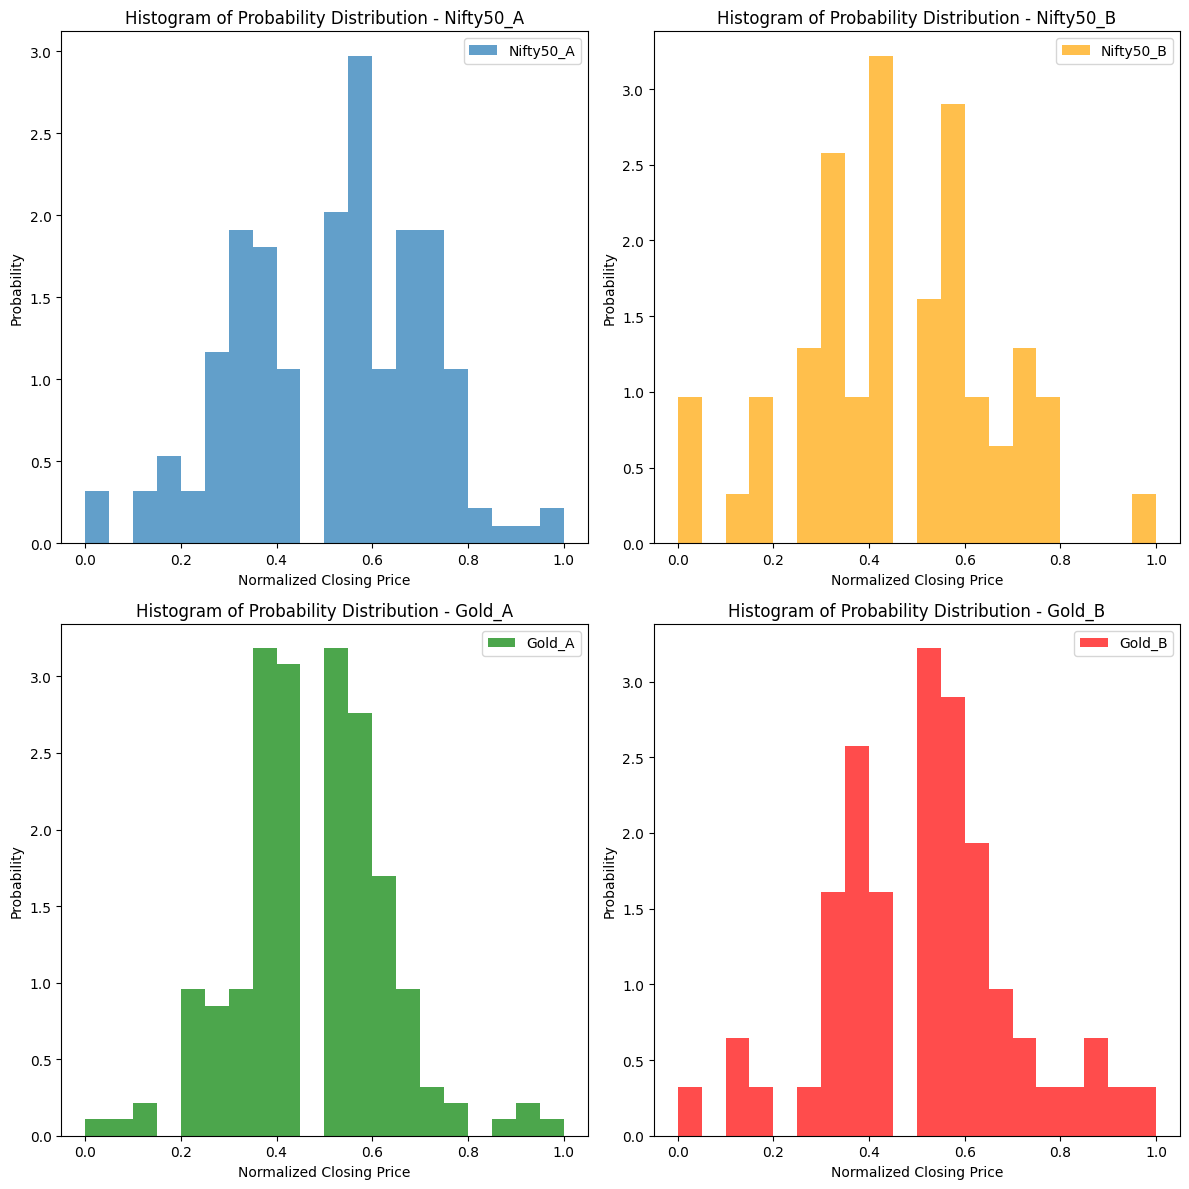

Area under the Histogram for Nifty50_A: 1.0
Area under the Histogram for Nifty50_B: 0.9999999999999999
Area under the Histogram for Gold_A: 0.9999999999999999
Area under the Histogram for Gold_B: 0.9999999999999999
Areas as an array:
[1. 1. 1. 1.]


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Function for min-max scaling and binning to compute probability distribution
def min_max_bin_distribution(data):
    min_val = data.min()
    max_val = data.max()
    scaled_data = (data - min_val) / (max_val - min_val)

    bins = np.linspace(0, 1, 20)
    binned_data, _ = np.histogram(scaled_data, bins=bins, density=True)

    return binned_data

# Apply the function to variables a, b, c, and d
a_prob_distribution = min_max_bin_distribution(a)
b_prob_distribution = min_max_bin_distribution(b)
c_prob_distribution = min_max_bin_distribution(c)
d_prob_distribution = min_max_bin_distribution(d)

# Plot the probability distributions
plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.plot(np.linspace(0, 1, len(a_prob_distribution)), a_prob_distribution, label='Nifty50_A')
plt.title('Probability Distribution - Nifty50_A')
plt.xlabel('Normalized Closing Price')
plt.ylabel('Probability')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(np.linspace(0, 1, len(b_prob_distribution)), b_prob_distribution, label='Nifty50_B', color='orange')
plt.title('Probability Distribution - Nifty50_B')
plt.xlabel('Normalized Closing Price')
plt.ylabel('Probability')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(np.linspace(0, 1, len(c_prob_distribution)), c_prob_distribution, label='Gold_A', color='green')
plt.title('Probability Distribution - Gold_A')
plt.xlabel('Normalized Closing Price')
plt.ylabel('Probability')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(np.linspace(0, 1, len(d_prob_distribution)), d_prob_distribution, label='Gold_B', color='red')
plt.title('Probability Distribution - Gold_B')
plt.xlabel('Normalized Closing Price')
plt.ylabel('Probability')
plt.legend()

plt.tight_layout()
plt.show()

# Plot histograms of the probability distributions
plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.hist(np.linspace(0, 1, len(a_prob_distribution)), bins=20, weights=a_prob_distribution, label='Nifty50_A', alpha=0.7)
plt.title('Histogram of Probability Distribution - Nifty50_A')
plt.xlabel('Normalized Closing Price')
plt.ylabel('Probability')
plt.legend()

plt.subplot(2, 2, 2)
plt.hist(np.linspace(0, 1, len(b_prob_distribution)), bins=20, weights=b_prob_distribution, label='Nifty50_B', color='orange', alpha=0.7)
plt.title('Histogram of Probability Distribution - Nifty50_B')
plt.xlabel('Normalized Closing Price')
plt.ylabel('Probability')
plt.legend()

plt.subplot(2, 2, 3)
plt.hist(np.linspace(0, 1, len(c_prob_distribution)), bins=20, weights=c_prob_distribution, label='Gold_A', color='green', alpha=0.7)
plt.title('Histogram of Probability Distribution - Gold_A')
plt.xlabel('Normalized Closing Price')
plt.ylabel('Probability')
plt.legend()

plt.subplot(2, 2, 4)
plt.hist(np.linspace(0, 1, len(d_prob_distribution)), bins=20, weights=d_prob_distribution, label='Gold_B', color='red', alpha=0.7)
plt.title('Histogram of Probability Distribution - Gold_B')
plt.xlabel('Normalized Closing Price')
plt.ylabel('Probability')
plt.legend()

plt.tight_layout()
plt.show()

# Calculate the area under the histograms
area_a = np.sum(np.diff(np.linspace(0, 1, len(a_prob_distribution) + 1)) * a_prob_distribution)
area_b = np.sum(np.diff(np.linspace(0, 1, len(b_prob_distribution) + 1)) * b_prob_distribution)
area_c = np.sum(np.diff(np.linspace(0, 1, len(c_prob_distribution) + 1)) * c_prob_distribution)
area_d = np.sum(np.diff(np.linspace(0, 1, len(d_prob_distribution) + 1)) * d_prob_distribution)

# Convert areas to an array
areas_array = np.array([area_a, area_b, area_c, area_d])

# Print the results
print(f"Area under the Histogram for Nifty50_A: {area_a}")
print(f"Area under the Histogram for Nifty50_B: {area_b}")
print(f"Area under the Histogram for Gold_A: {area_c}")
print(f"Area under the Histogram for Gold_B: {area_d}")

# Print the areas as an array
print("Areas as an array:")
print(areas_array)



Y-coordinates of Probability Distribution  Histogram - Nifty50_A:
[0.31843575418994413, 0.0, 0.31843575418994413, 0.5307262569832403, 0.31843575418994413, 1.1675977653631284, 1.910614525139665, 1.8044692737430168, 1.0614525139664805, 2.016759776536313, 2.972067039106142, 1.0614525139664817, 1.9106145251396671, 1.910614525139663, 1.0614525139664794, 0.21229050279329634, 0.10614525139664817, 0.10614525139664795, 0.2122905027932959]

Y-coordinates of Probability Distribution Histogram - Nifty50_B:
[0.9661016949152542, 0.0, 0.3220338983050847, 0.9661016949152542, 0.0, 1.2881355932203389, 2.5762711864406778, 0.9661016949152542, 3.2203389830508473, 1.6101694915254237, 2.89830508474576, 0.9661016949152553, 0.6440677966101702, 1.2881355932203378, 0.9661016949152533, 0.0, 0.0, 0.0, 0.32203389830508444]

Y-coordinates of Probability Distribution Histogram - Gold_A:
[0.10614525139664804, 0.10614525139664804, 0.2122905027932961, 0.0, 0.9553072625698324, 0.8491620111731844, 0.9553072625698324, 3.18

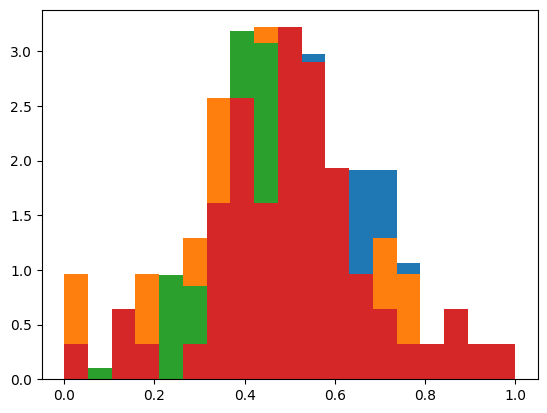

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Function for min-max scaling and binning to compute probability distribution
def min_max_bin_distribution(data):
    min_val = data.min()
    max_val = data.max()
    scaled_data = (data - min_val) / (max_val - min_val)

    bins = np.linspace(0, 1, 20)
    _, _, patches = plt.hist(scaled_data, bins=bins, density=True)
    
    # Extracting y-coordinates from the patches
    y_coordinates = [patch.get_height() for patch in patches]

    return y_coordinates

# Apply the function to variables a, b, c, and d
a_prob_distribution = min_max_bin_distribution(a)
b_prob_distribution = min_max_bin_distribution(b)
c_prob_distribution = min_max_bin_distribution(c)
d_prob_distribution = min_max_bin_distribution(d)

# Print the y-coordinates of the probability distribution histograms
print("Y-coordinates of Probability Distribution  Histogram - Nifty50_A:")
print(a_prob_distribution)

print("\nY-coordinates of Probability Distribution Histogram - Nifty50_B:")
print(b_prob_distribution)

print("\nY-coordinates of Probability Distribution Histogram - Gold_A:")
print(c_prob_distribution)

print("\nY-coordinates of Probability Distribution Histogram - Gold_B:")
print(d_prob_distribution)



In [5]:
import numpy as np

# Y-coordinates of Probability Distribution Histogram - Nifty50_A
A = np.array([0.31843575418994413, 0.0, 0.31843575418994413, 0.5307262569832403, 0.31843575418994413, 1.1675977653631284, 1.910614525139665, 1.8044692737430168, 1.0614525139664805, 2.016759776536313, 2.972067039106142, 1.0614525139664817, 1.9106145251396671, 1.910614525139663, 1.0614525139664794, 0.21229050279329634, 0.10614525139664817, 0.10614525139664795, 0.2122905027932959])

# Y-coordinates of Probability Distribution Histogram - Nifty50_B
B = np.array([0.9661016949152542, 0.0, 0.3220338983050847, 0.9661016949152542, 0.0, 1.2881355932203389, 2.5762711864406778, 0.9661016949152542, 3.2203389830508473, 1.6101694915254237, 2.89830508474576, 0.9661016949152553, 0.6440677966101702, 1.2881355932203378, 0.9661016949152533, 0.0, 0.0, 0.0, 0.32203389830508444])

# Y-coordinates of Probability Distribution Histogram - Gold_A
C = np.array([0.10614525139664804, 0.10614525139664804, 0.2122905027932961, 0.0, 0.9553072625698324, 0.8491620111731844, 0.9553072625698324, 3.184357541899441, 3.078212290502793, 3.184357541899441, 2.759776536312846, 1.6983240223463707, 0.9553072625698336, 0.3184357541899438, 0.2122905027932959, 0.0, 0.10614525139664817, 0.2122905027932959, 0.10614525139664795])

# Y-coordinates of Probability Distribution Histogram - Gold_B
D = np.array([0.3220338983050847, 0.0, 0.6440677966101694, 0.3220338983050847, 0.0, 0.3220338983050847, 1.6101694915254237, 2.5762711864406778, 1.6101694915254237, 3.2203389830508473, 2.89830508474576, 1.9322033898305107, 0.9661016949152553, 0.6440677966101689, 0.32203389830508444, 0.3220338983050851, 0.6440677966101702, 0.32203389830508444, 0.32203389830508444])

In [6]:
import numpy as np

# Y-coordinates of Probability Distribution Histogram - Nifty50_A
A = np.array([0.31843575418994413, 0.0, 0.31843575418994413, 0.5307262569832403, 0.31843575418994413, 1.1675977653631284, 1.910614525139665, 1.8044692737430168, 1.0614525139664805, 2.016759776536313, 2.972067039106142, 1.0614525139664817, 1.9106145251396671, 1.910614525139663, 1.0614525139664794, 0.21229050279329634, 0.10614525139664817, 0.10614525139664795, 0.2122905027932959])


# Y-coordinates of Probability Distribution Histogram - Nifty50_B
B = np.array([0.9661016949152542, 0.0, 0.3220338983050847, 0.9661016949152542, 0.0, 1.2881355932203389, 2.5762711864406778, 0.9661016949152542, 3.2203389830508473, 1.6101694915254237, 2.89830508474576, 0.9661016949152553, 0.6440677966101702, 1.2881355932203378, 0.9661016949152533, 0.0, 0.0, 0.0, 0.32203389830508444])

# Initialize an empty result array
result = []

# Perform the operation
for i in range(len(A)):
    for j in range(len(B)):
        result.append(A[i] * B[j])

# Convert the result to a NumPy array
result = np.array(result)

# Reshape the result to have the same number of rows as A and columns as B
result = result.reshape(len(A), len(B))

# Save the result to a CSV file
np.savetxt('H(A,B).csv', result.flatten(), delimiter=',', fmt='%0.8f')



In [7]:
import numpy as np

# Y-coordinates of Probability Distribution Histogram - Nifty50_A
A = np.array([0.31843575418994413, 0.0, 0.31843575418994413, 0.5307262569832403, 0.31843575418994413, 1.1675977653631284, 1.910614525139665, 1.8044692737430168, 1.0614525139664805, 2.016759776536313, 2.972067039106142, 1.0614525139664817, 1.9106145251396671, 1.910614525139663, 1.0614525139664794, 0.21229050279329634, 0.10614525139664817, 0.10614525139664795, 0.2122905027932959])



# Y-coordinates of Probability Distribution Histogram - Gold_A
C = np.array([0.10614525139664804, 0.10614525139664804, 0.2122905027932961, 0.0, 0.9553072625698324, 0.8491620111731844, 0.9553072625698324, 3.184357541899441, 3.078212290502793, 3.184357541899441, 2.759776536312846, 1.6983240223463707, 0.9553072625698336, 0.3184357541899438, 0.2122905027932959, 0.0, 0.10614525139664817, 0.2122905027932959, 0.10614525139664795])


# Initialize an empty result array
result = []

# Perform the operation
for i in range(len(A)):
    for j in range(len(C)):
        result.append(A[i] * C[j])

# Convert the result to a NumPy array
result = np.array(result)

# Reshape the result to have the same number of rows as A and columns as C
result = result.reshape(len(A), len(C))

# Save the result to a CSV file
np.savetxt('H(A,C).csv', result.flatten(), delimiter=',', fmt='%0.8f')



In [8]:
import numpy as np
import csv

# Y-coordinates of Probability Distribution Histogram - Nifty50_A
A = np.array([0.31843575418994413, 0.0, 0.31843575418994413, 0.5307262569832403, 0.31843575418994413, 1.1675977653631284, 1.910614525139665, 1.8044692737430168, 1.0614525139664805, 2.016759776536313, 2.972067039106142, 1.0614525139664817, 1.9106145251396671, 1.910614525139663, 1.0614525139664794, 0.21229050279329634, 0.10614525139664817, 0.10614525139664795, 0.2122905027932959])


# Y-coordinates of Probability Distribution Histogram - Nifty50_B
B = np.array([0.9661016949152542, 0.0, 0.3220338983050847, 0.9661016949152542, 0.0, 1.2881355932203389, 2.5762711864406778, 0.9661016949152542, 3.2203389830508473, 1.6101694915254237, 2.89830508474576, 0.9661016949152553, 0.6440677966101702, 1.2881355932203378, 0.9661016949152533, 0.0, 0.0, 0.0, 0.32203389830508444])


# Y-coordinates of Probability Distribution Histogram - Gold_A
C = np.array([0.10614525139664804, 0.10614525139664804, 0.2122905027932961, 0.0, 0.9553072625698324, 0.8491620111731844, 0.9553072625698324, 3.184357541899441, 3.078212290502793, 3.184357541899441, 2.759776536312846, 1.6983240223463707, 0.9553072625698336, 0.3184357541899438, 0.2122905027932959, 0.0, 0.10614525139664817, 0.2122905027932959, 0.10614525139664795])


# Initialize an empty result list
result_list = []

# Perform the operation and append results to the list
for i in range(len(A)):
    for j in range(len(B)):
        for k in range(len(C)):
            result = A[i] * B[j] * C[k]
            result_list.append(result)

# Convert the result list to a NumPy array
result_array = np.array(result_list)

# Save the result array to a CSV file
csv_filename = "H(A,B,C).csv"
np.savetxt(csv_filename, result_array, delimiter=",")

print(f"Results saved to {csv_filename}")




Results saved to H(A,B,C).csv


In [9]:
import numpy as np

# Y-coordinates of Probability Distribution Histogram - Nifty50_A
A = np.array([0.31843575418994413, 0.0, 0.31843575418994413, 0.5307262569832403, 0.31843575418994413, 1.1675977653631284, 1.910614525139665, 1.8044692737430168, 1.0614525139664805, 2.016759776536313, 2.972067039106142, 1.0614525139664817, 1.9106145251396671, 1.910614525139663, 1.0614525139664794, 0.21229050279329634, 0.10614525139664817, 0.10614525139664795, 0.2122905027932959])

# Add a small constant to avoid taking the log of zero
epsilon = 1e-10
A = A + epsilon

# Calculate the summation of p(a) * log2(p(a))
result = np.sum(A * np.log2(A))

# Print the result
print("H(A):", result)


H(A): 10.438459181818612


In [10]:
#H(A,B,C)
import numpy as np
import pandas as pd

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv('H(A,B,C).csv', header=None, names=['values'])

# Extract the values from the DataFrame
values = df['values'].values

# Replace NaN or missing values with 0
values = np.nan_to_num(values)

# Add a small constant to avoid zero values
values = values + 1e-10

# Calculate the summation of p(a) * log2(p(a))
result = np.sum(values * np.log2(values))

# Print the result
print("H(A,B,C)):", result)



H(A,B,C)): 14962.076484260488


In [11]:
import numpy as np
import pandas as pd

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv('H(A,B).csv', header=None, names=['values'])

# Extract the values from the DataFrame
values = df['values'].values

# Replace NaN or missing values with 0
values = np.nan_to_num(values)

# Add a small constant to avoid zero values
values = values + 1e-10

# Calculate the summation of p(a) * log2(p(a))
result = np.sum(values * np.log2(values))

# Print the result
print("H(A,B)):", result)




H(A,B)): 459.5017866074955


In [12]:
import numpy as np
import pandas as pd

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv('H(A,C).csv', header=None, names=['values'])

# Extract the values from the DataFrame
values = df['values'].values

# Replace NaN or missing values with 0
values = np.nan_to_num(values)

# Add a small constant to avoid zero values
values = values + 1e-10

# Calculate the summation of p(a) * log2(p(a))
result = np.sum(values * np.log2(values))

# Print the result
print("H(A,C):", result)




H(A,C): 526.3066473143199


In [13]:
import numpy as np

# H(A,B,C)
H_A_B_C = 14962.076484260488

# H(A,B)
H_A_B = 459.5017866074955

# H(A,C)
H_A_C = 526.3066473143199

# H(A)
H_A = 10.438459181818612

# Calculate H(B|A) and H(B|(A,C))
H_B_given_A = H_A_B - H_A
H_B_given_A_C = H_A_B_C - H_A_C

# Print the results
print("H(B|A):", H_B_given_A)
print("H(B|(A,C)):", H_B_given_A_C)



H(B|A): 449.0633274256769
H(B|(A,C)): 14435.769836946169


In [14]:
# Calculating the Transfer Entropy

difference = H_B_given_A - H_B_given_A_C

# Print the result
print("H(B|A) - H(B|(A,C)):", difference)



H(B|A) - H(B|(A,C)): -13986.706509520493


What we calculate above is called transfer entropy from A to B ... which is negative which signifies there is negative information flow from A to B ...